In [4]:
%matplotlib inline
from IPython.display import YouTubeVideo
YouTubeVideo('w26x-z-BdWQ')

In [6]:
import pandas
pandas.__version__

'0.14.1'

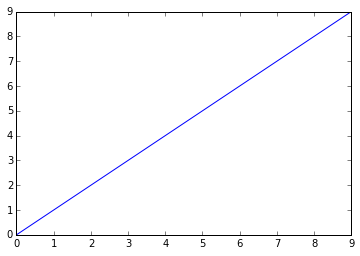

In [10]:
import matplotlib.pyplot as plt
plt.plot(range(10))

Main pandas data models are Series (1D) and DataFrame (2D). Series is a subclass of numpy.ndarray.  
Index labels do not have to be ordered and duplicates are allowed.  
Indexes are for fast lookup and join. Hierarchical indexes.  
Data alignment, dataframe manipulation.  
In a dataframe, each column can be of different dtypes.  


In [3]:
import pandas as pd
from numpy.random import randn
df1 = pd.DataFrame(randn(3,2))
df2 = pd.DataFrame(randn(3,2))
print(df1)
print(df2)
df1+df2

          0         1
0  0.184519 -1.252510
1 -1.092305 -0.696186
2  0.139191 -0.433829
          0         1
0  0.599671 -1.103609
1 -0.479809 -0.091513
2 -0.391440 -0.611138


,0,1
0,0.784191,-2.356119
1,-1.572114,-0.787699
2,-0.252249,-1.044967


Groupby - Split data into different groups, apply transformation to each group, combine into the output  

GroupBy
* DataFrame Columns
* Arrays of Labels
* Functions, applied to axis labels

axis = 0 -> Rows
axis = 1 -> Columns


In [13]:
%matplotlib inline
import pandas as pd
from pandas import *
import numpy as np
import matplotlib.pyplot as plt

def side_by_side(*objs, **kwds):
    from pandas.core.common import adjoin
    space = kwds.get('space', 4)
    reprs = [repr(obj).split(']n') for obj in objs]
    print(adjoin(space, *reprs))

plt.rc("figure", figsize=(10,6))

##Series

In [11]:
randn(5)

array([-0.82943124,  0.09870218, -0.72216502, -0.53382978,  1.33082311])

In [15]:
labels = ['a','b','c','d','e']
s = Series(randn(5), index = labels)
s

a   -0.219137
b    0.747449
c   -0.792511
d   -0.661819
e    1.233316
dtype: float64

In [18]:
'b' in s # Like a dictionary

True

In [19]:
s['b']

0.74744895279693502

In [20]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [21]:
#Convert into dict
mapping = s.to_dict()
mapping

{'a': -0.21913692092289427,
 'b': 0.74744895279693502,
 'c': -0.7925114723888147,
 'd': -0.66181946347617904,
 'e': 1.2333161705689886}

In [24]:
back_to_s = Series(mapping) #automatically sorts the keys and uses them as index
back_to_s

a   -0.219137
b    0.747449
c   -0.792511
d   -0.661819
e    1.233316
dtype: float64

In [26]:
back_to_s2 = Series(mapping, index=['b','c','a','f']) #Only selects those indexes
back_to_s2

b    0.747449
c   -0.792511
a   -0.219137
f         NaN
dtype: float64

In [30]:
isnull(back_to_s2)  # checking for NaN or null values

b    False
c    False
a    False
f     True
dtype: bool

In [32]:
np.isnan(back_to_s2) # checking for NaN or null values - method 2

b    False
c    False
a    False
f     True
dtype: bool

In [35]:
back_to_s2.dropna() # drop NaN values

b    0.747449
c   -0.792511
a   -0.219137
dtype: float64

In [38]:
back_to_s2[notnull(back_to_s2)] # drop NaN values - method 2

b    0.747449
c   -0.792511
a   -0.219137
dtype: float64

In [39]:
s * 2 # Multiplies each value by 2

a   -0.438274
b    1.494898
c   -1.585023
d   -1.323639
e    2.466632
dtype: float64

In [40]:
s[:3] # Slicing

a   -0.219137
b    0.747449
c   -0.792511
dtype: float64

###DataFrame : 2D Collection of Series

In [41]:
df = DataFrame({'a':randn(6), 'b':['foo', 'bar'] * 3, 'c':randn(6)})
df

,a,b,c
0,-0.933016,foo,-0.753259
1,0.287921,bar,0.210949
2,0.219803,foo,0.006537
3,-0.690054,bar,-0.732027
4,-0.366379,foo,-0.180545
5,0.118906,bar,-0.541733


In [51]:
print(['foo','bar'] * 3)
np.tile(['foo','bar'],3) # Numpy style

['foo', 'bar', 'foo', 'bar', 'foo', 'bar']


array(['foo', 'bar', 'foo', 'bar', 'foo', 'bar'], 
      dtype='<U3')

In [45]:
#Method 2
df2 = DataFrame([randn(3), randn(3), randn(3)], columns=["a","b","c"])
df2

,a,b,c
0,1.506305,1.732779,-1.257934
1,0.222416,0.099890,-1.724095
2,1.652925,-0.776093,-1.623887


In [46]:
df['a']

0   -0.933016
1    0.287921
2    0.219803
3   -0.690054
4   -0.366379
5    0.118906
Name: a, dtype: float64

In [47]:
df.index

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [49]:
df['d'] = ['a','b','c'] * 2
df

,a,b,c,d
0,-0.933016,foo,-0.753259,a
1,0.287921,bar,0.210949,b
2,0.219803,foo,0.006537,c
3,-0.690054,bar,-0.732027,a
4,-0.366379,foo,-0.180545,b
5,0.118906,bar,-0.541733,c


In [52]:
df[:3]

,a,b,c,d
0,-0.933016,foo,-0.753259,a
1,0.287921,bar,0.210949,b
2,0.219803,foo,0.006537,c


In [53]:
df[:-2]

,a,b,c,d
0,-0.933016,foo,-0.753259,a
1,0.287921,bar,0.210949,b
2,0.219803,foo,0.006537,c
3,-0.690054,bar,-0.732027,a


In [54]:
df[-2:]

,a,b,c,d
4,-0.366379,foo,-0.180545,b
5,0.118906,bar,-0.541733,c


In [55]:
df.xs(0) # row 0

a   -0.9330162
b          foo
c   -0.7532589
d            a
Name: 0, dtype: object

In [56]:
df.xs(0).index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [58]:
df.ix[0]

a   -0.9330162
b          foo
c   -0.7532589
d            a
Name: 0, dtype: object

In [65]:
df.ix[0,'c']

-0.75325893669805166

In [66]:
%timeit df.ix[0,2]   # Number index works, but slower than column name

10000 loops, best of 3: 177 µs per loop


In [67]:
%timeit df.ix[0,'b']

The slowest run took 8.93 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 4.32 µs per loop


In [68]:
%timeit df.get_value(0,'b')   # Slightly faster

The slowest run took 13.03 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 2.74 µs per loop


In [70]:
df.ix[2:4,'b']
# df.get_value(2:4,'b') wont work

2    foo
3    bar
4    foo
Name: b, dtype: object

In [73]:
df.ix[2:4,'b':'e']  # Excluding 4 and e

,b,c,d
2,foo,0.006537,c
3,bar,-0.732027,a
4,foo,-0.180545,b


In [75]:
df.ix[[0,2,4]]

,a,b,c,d
0,-0.933016,foo,-0.753259,a
2,0.219803,foo,0.006537,c
4,-0.366379,foo,-0.180545,b


In [76]:
%timeit df.ix[[0,2,4]]

1000 loops, best of 3: 215 µs per loop


In [79]:
%timeit df.loc[[0,2,4]]   # Slightly faster. 

1000 loops, best of 3: 203 µs per loop


In [81]:
df.ix[[1,2],['b','d']]

,b,d
1,bar,b
2,foo,c


In [82]:
df['c']>0

0    False
1     True
2     True
3    False
4    False
5    False
Name: c, dtype: bool

In [83]:
df[df['c']>0]

,a,b,c,d
1,0.287921,bar,0.210949,b
2,0.219803,foo,0.006537,c


In [84]:
df.ix[df['c']>0]

,a,b,c,d
1,0.287921,bar,0.210949,b
2,0.219803,foo,0.006537,c


In [85]:
df.columns

Index(['a', 'b', 'c', 'd'], dtype='object')

In [86]:
df.index

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [89]:
dfi = pd.DataFrame([{'a':5,'b':0},{'a':3,'c':6},{'a':10,'b':12,'c':4}])
dfi

,a,b,c
0,5,0,NaN
1,3,NaN,6
2,10,12,4


### Using Date Range

In [100]:
print([date for date in pd.date_range('04/20/2015',periods=10)])
daterange = DataFrame({'a':randn(6),
                      'b':['foo','bar']*3,
                      'c':randn(6)},
                      index=pd.date_range('1/1/2000',periods=6))
daterange

[Timestamp('2015-04-20 00:00:00', offset='D'), Timestamp('2015-04-21 00:00:00', offset='D'), Timestamp('2015-04-22 00:00:00', offset='D'), Timestamp('2015-04-23 00:00:00', offset='D'), Timestamp('2015-04-24 00:00:00', offset='D'), Timestamp('2015-04-25 00:00:00', offset='D'), Timestamp('2015-04-26 00:00:00', offset='D'), Timestamp('2015-04-27 00:00:00', offset='D'), Timestamp('2015-04-28 00:00:00', offset='D'), Timestamp('2015-04-29 00:00:00', offset='D')]


,a,b,c
2000-01-01,-0.426569,foo,1.508679
2000-01-02,0.699453,bar,0.956910
2000-01-03,-1.284162,foo,2.054117
2000-01-04,0.218545,bar,-2.377485
2000-01-05,0.993445,foo,-0.561042
2000-01-06,0.986684,bar,0.942044


In [102]:
# Specify column order
dfc = DataFrame({'a':randn(6)},columns=['b','a'])
dfc

,b,a
0,NaN,-0.209856
1,NaN,0.599580
2,NaN,-2.027295
3,NaN,-0.180911
4,NaN,1.262878
5,NaN,-0.363504


#### pass dict of dicts as argument. Outer dict becomes columns, inner dict rows.

```python
df = read_csv('file.csv', index_col = 0, parse_dates=True)
```

If we create index with date_range or specify read_csv should index and parse_dates, then when we manipulate the dataframes, they are aligned properly based on the date as shown below

In [113]:
df1 = DataFrame({'val':randn(6)},index=pd.date_range('1/1/2000',periods=6))
df2 = DataFrame({'val':randn(6)},index=pd.date_range('1/4/2000',periods=6))
print(df1)
print(df2)
print(df1+df2)
print((df1+df2).dropna())

                 val
2000-01-01  0.046315
2000-01-02 -0.672273
2000-01-03 -1.025196
2000-01-04 -1.177075
2000-01-05  0.101387
2000-01-06  0.052195
                 val
2000-01-04  0.166149
2000-01-05  0.154178
2000-01-06  0.260228
2000-01-07 -0.914625
2000-01-08  0.524231
2000-01-09  0.290329
                 val
2000-01-01       NaN
2000-01-02       NaN
2000-01-03       NaN
2000-01-04 -1.010926
2000-01-05  0.255565
2000-01-06  0.312423
2000-01-07       NaN
2000-01-08       NaN
2000-01-09       NaN
                 val
2000-01-04 -1.010926
2000-01-05  0.255565
2000-01-06  0.312423


In [117]:
# If you want to substitute zero and add
print(df1.add(df2,fill_value=0))

                 val
2000-01-01  0.046315
2000-01-02 -0.672273
2000-01-03 -1.025196
2000-01-04 -1.010926
2000-01-05  0.255565
2000-01-06  0.312423
2000-01-07 -0.914625
2000-01-08  0.524231
2000-01-09  0.290329


###Conform dateframes, Re-indexing

In [145]:
print(df1.reindex(df2.index))   # Conform df1 to df2's index range.
print(df1.reindex(df2.index,fill_value=0))  # Fill blanks with zero
print(df1.ix[df2.index])        # Method 2
# side_by_side(df1.ix[df2.index],df2) # Doesn't display side by side for some reason. So, trying the below method
# df1.ix[df2.index].append(df2)
concat([df1.ix[df2.index],df2],axis=1)

                 val
2000-01-04 -1.177075
2000-01-05  0.101387
2000-01-06  0.052195
2000-01-07       NaN
2000-01-08       NaN
2000-01-09       NaN
                 val
2000-01-04 -1.177075
2000-01-05  0.101387
2000-01-06  0.052195
2000-01-07  0.000000
2000-01-08  0.000000
2000-01-09  0.000000
                 val
2000-01-04 -1.177075
2000-01-05  0.101387
2000-01-06  0.052195
2000-01-07       NaN
2000-01-08       NaN
2000-01-09       NaN


,val,val
2000-01-04,-1.177075,0.166149
2000-01-05,0.101387,0.154178
2000-01-06,0.052195,0.260228
2000-01-07,NaN,-0.914625
2000-01-08,NaN,0.524231
2000-01-09,NaN,0.290329


In [154]:
# Inner Join
a,b = df1.align(df2,join='inner')
print(concat([a,b],axis=1))
# Outer join
a,b = df1.align(df2,join='outer')
print(concat([a,b],axis=1))

                 val       val
2000-01-04 -1.177075  0.166149
2000-01-05  0.101387  0.154178
2000-01-06  0.052195  0.260228
                 val       val
2000-01-01  0.046315       NaN
2000-01-02 -0.672273       NaN
2000-01-03 -1.025196       NaN
2000-01-04 -1.177075  0.166149
2000-01-05  0.101387  0.154178
2000-01-06  0.052195  0.260228
2000-01-07       NaN -0.914625
2000-01-08       NaN  0.524231
2000-01-09       NaN  0.290329
